In [8]:
## Build a simple Workflow or Graph Using LangGraph

#State
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [ ]:
#Node

def start_play(state:State):
    print("Start_play node has been called")
    return{"graph_info":state['graph_info'] + "I am planning to play"}

def tennis(state:State):
    print("My cricket node has been called")
    return{"graph_info":state['graph_info'] + "I am planning to play tennis"}

def football(state:State):
    print("My cricket node has been called:{graph_info}")
    
    return{"graph_info":state['graph_info'] + "I am planning to play football"}


In [ ]:
import random
from typing import Literal

def random_play(state:State)-> Literal["tennis", 'football']:
    graph_info=state["graph_info"]
    print(graph_info)
    if random.random()>0.5:
        return "football"
    else:
        return "tennis"

In [17]:
from IPython.display import Image, display
from langgraph.graph import StateGraph,START,END

#Build Graph
graph=StateGraph(State)

#Adding the nodes

graph.add_node("start_play",start_play)
graph.add_node("football", football)
graph.add_node("tennis",tennis)

##Schedule the flow of the graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("football",END)
graph.add_edge("tennis",END)


# Compile the graph
graph_builder=graph.compile()


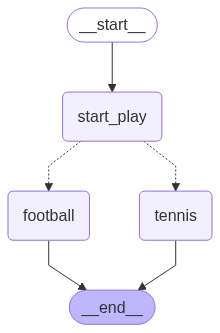

In [23]:
#View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [24]:
## GRAPH Invocation
graph_builder.invoke({"graph_info":"My name is Etienne and "})

Start_play node has been called
My cricket node has been called


{'graph_info': 'My name is Etienne and I am planning to playI am planning to play football'}